In [95]:
import numpy as np  
import pandas as pd
import seaborn as sns
import scipy.stats
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [96]:
#Stop showing warning messages
import warnings
warnings.simplefilter('ignore')

In [97]:
df = pd.read_excel("E:/SEM2/1.SUBJECTS/BRM/demo_ins.xlsx",index_col=0)
insurance=df

In [98]:
insurance.shape

(98, 16)

In [99]:
insurance.head()

,Starting Age,Family,Gender,Occupation,Approximate Annual Income,Renewal Tenure,Policy Type,Co_insurer1,Co_insurer2,Co_insurer1OccupationStatus,Co_insurer2OccupationStatus,Premium,Renewed,Churned,Churn_Reason,Company
Age,,,,,,,,,,,,,,,,
56,4,4,Male,Government Office Clerk,900000,1,Single,None,None,Not Applicable,Not Applicable,31000,Yes,No,Not Applicable,The New India Assurance Co. Ltd.
51,3,4,Male,Government Office Clerk,850000,1,Single,None,None,Not Applicable,Not Applicable,31000,Yes,No,Not Applicable,The New India Assurance Co. Ltd.
30,20,3,Male,IT Consultant,120000,1,Joint,Wife,None,Working,Not Applicable,31000,Yes,No,Not Applicable,The New India Assurance Co. Ltd.
26,1,4,Male,IT Consultant,600000,1,Single,None,None,Not Applicable,Not Applicable,18000,Yes,No,Not Applicable,The New India Assurance Co. Ltd.
21,2,4,Male,IT Consultant,400000,1,Single,None,None,Not Applicable,Not Applicable,18000,Yes,No,Not Applicable,The New India Assurance Co. Ltd.


In [100]:
insurance['Churned'].value_counts()

No     66
Yes    32
Name: Churned, dtype: int64

In [101]:
insurance['Churned'].replace(['No','Yes'],[0, 1], inplace=True)

Sample mean, standard error of the mean, and estimating the population mean

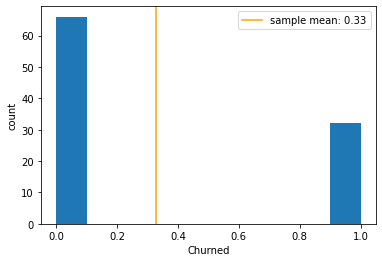

In [102]:
x = insurance['Churned'].values
x_mean = np.mean(x)
plt.hist(x, bins=10)
plt.axvline(x_mean, color='orange', label='sample mean: %.2f' % x_mean)
plt.xlabel('Churned')
plt.ylabel('count')
plt.legend(loc=1)
plt.show()

In [103]:
def bootstrap_means(x, n_bootstrap_samples, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = rng.choice(x, size=x.shape[0], replace=True)
        # replicate is a general term for a statistic computed
        # from a bootstrap sample
        bootstrap_replicate = np.mean(boot_sample)
        sample_means[i] = bootstrap_replicate
    return sample_means

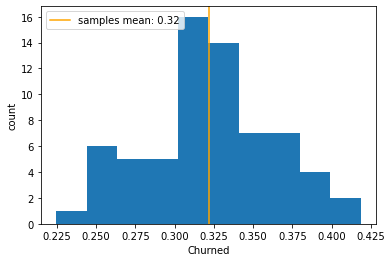

In [104]:
boot_67 = bootstrap_means(x, n_bootstrap_samples=67, seed=123)

boot_mean = np.mean(boot_67)
plt.hist(boot_67, bins=10)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('Churned')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

In [105]:
le=LabelEncoder()

In [107]:
insurance['Gender']=le.fit_transform(insurance['Gender'])
insurance['Policy Type']=le.fit_transform(insurance['Policy Type'])
insurance['Co_insurer1']=le.fit_transform(insurance['Co_insurer1'])
insurance['Co_insurer2']=le.fit_transform(insurance['Co_insurer2'])
insurance['Co_insurer1OccupationStatus']=le.fit_transform(insurance['Co_insurer1OccupationStatus'])
insurance['Co_insurer2OccupationStatus']=le.fit_transform(insurance['Co_insurer2OccupationStatus'])
insurance['Renewed']=le.fit_transform(insurance['Renewed'])
insurance['Renewed']=le.fit_transform(insurance['Renewed'])
insurance=insurance.drop(['Churn_Reason', 'Company'], axis = 1)

In [108]:
insurance['Occupation']=le.fit_transform(insurance['Occupation'])

In [109]:
insurance.head(3)

,Starting Age,Family,Gender,Occupation,Approximate Annual Income,Renewal Tenure,Policy Type,Co_insurer1,Co_insurer2,Co_insurer1OccupationStatus,Co_insurer2OccupationStatus,Premium,Renewed,Churned
Age,,,,,,,,,,,,,,
56,4,4,1,1,900000,1,1,3,0,1,0,31000,1,0
51,3,4,1,1,850000,1,1,3,0,1,0,31000,1,0
30,20,3,1,5,120000,1,0,6,0,3,0,31000,1,0


In [110]:
corr_insurance = insurance.corr()

<AxesSubplot:>

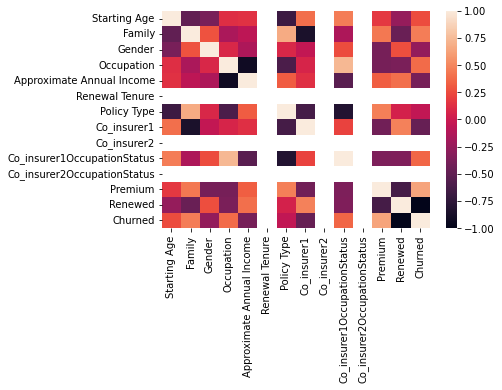

In [111]:
sns.heatmap(corr_insurance.corr())


In [112]:
plt.savefig("E:/SEM2/1.SUBJECTS/BRM/Insurance_Correlation_HeatMap.jpg")

<Figure size 432x288 with 0 Axes>

                             Starting Age    Family    Gender  Occupation  \
Starting Age                     1.000000 -0.233384 -0.112248    0.003705   
Family                          -0.233384  1.000000  0.294735   -0.099183   
Gender                          -0.112248  0.294735  1.000000    0.059358   
Occupation                       0.003705 -0.099183  0.059358    1.000000   
Approximate Annual Income        0.209875  0.029686 -0.000148   -0.677671   
Renewal Tenure                        NaN       NaN       NaN         NaN   
Policy Type                     -0.468863  0.510408  0.118639   -0.382768   
Co_insurer1                      0.204032 -0.453139  0.057826    0.029424   
Co_insurer2                           NaN       NaN       NaN         NaN   
Co_insurer1OccupationStatus      0.312827  0.096694  0.331741    0.436480   
Co_insurer2OccupationStatus           NaN       NaN       NaN         NaN   
Premium                          0.250464  0.237713 -0.071249   -0.258278   

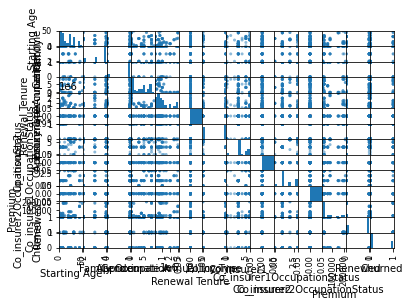

In [113]:
from pandas.plotting import scatter_matrix
scatter_matrix(insurance)
print(insurance.corr())

In [114]:
insurance['Churned'].replace([0, 1],['No','Yes'], inplace=True)

In [115]:
insurance.Churned.value_counts()

No     66
Yes    32
Name: Churned, dtype: int64

In [116]:
insurance.Churned=(insurance.Churned).str.strip()

In [117]:
insurance.Churned.unique()

array(['No', 'Yes'], dtype=object)

In [118]:
target_count=insurance.Churned.value_counts()
target_count

No     66
Yes    32
Name: Churned, dtype: int64

In [120]:
66/32 #Imbalance ratio

2.0625

<AxesSubplot:>

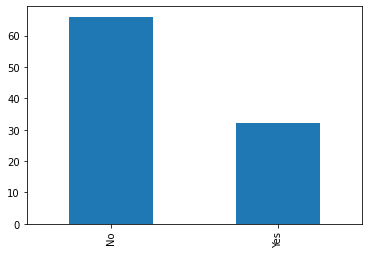

In [121]:
target_count.plot(kind="bar")

In [122]:
class_0 = insurance[insurance['Churned'] == 'No']
class_1 = insurance[insurance['Churned'] == 'Yes']

In [123]:
class_1_over = class_1.sample(target_count[0], replace=True)

In [124]:
class_1_over.shape

(66, 14)

In [125]:
newdata=pd.concat([class_1_over, class_0], axis=0)

In [126]:
newdata.shape

(132, 14)

In [127]:
newdata.Churned.unique()

array(['Yes', 'No'], dtype=object)

In [128]:
newdata.Churned.value_counts()

Yes    66
No     66
Name: Churned, dtype: int64

In [129]:
newdata

,Starting Age,Family,Gender,Occupation,Approximate Annual Income,Renewal Tenure,Policy Type,Co_insurer1,Co_insurer2,Co_insurer1OccupationStatus,Co_insurer2OccupationStatus,Premium,Renewed,Churned
Age,,,,,,,,,,,,,,
54,32,4,1,7,100000,1,0,5,0,3,0,31000,0,Yes
22,12,4,0,5,1200000,1,0,5,0,3,0,31000,0,Yes
58,9,4,1,8,900000,1,1,3,0,1,0,190000,0,Yes
57,31,4,1,7,100000,1,0,5,0,3,0,31000,0,Yes
54,31,4,1,7,100000,1,0,5,0,3,0,31000,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,25,2,0,3,1000000,1,0,5,0,0,0,19000,1,No
30,8,3,1,0,2000000,1,1,3,0,1,0,31000,1,No
24,22,2,1,8,500000,1,0,6,0,2,0,19000,1,No


In [130]:
newdata.to_excel("E:/SEM2/1.SUBJECTS/BRM/Insurance_Classification_Balanced_demo.xlsx")

In [131]:
newdata['Churned'].replace(['No','Yes'],[0, 1], inplace=True)

In [132]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 54 to 32
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Starting Age                 132 non-null    int64
 1   Family                       132 non-null    int64
 2   Gender                       132 non-null    int64
 3   Occupation                   132 non-null    int32
 4   Approximate Annual Income    132 non-null    int64
 5   Renewal Tenure               132 non-null    int64
 6   Policy Type                  132 non-null    int64
 7   Co_insurer1                  132 non-null    int32
 8   Co_insurer2                  132 non-null    int32
 9   Co_insurer1OccupationStatus  132 non-null    int32
 10  Co_insurer2OccupationStatus  132 non-null    int32
 11  Premium                      132 non-null    int64
 12  Renewed                      132 non-null    int64
 13  Churned                      132 non-null    int64

In [133]:
newdata['Family']=newdata['Family'].fillna(newdata['Family'].mode().iloc[0])

In [134]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 54 to 32
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Starting Age                 132 non-null    int64
 1   Family                       132 non-null    int64
 2   Gender                       132 non-null    int64
 3   Occupation                   132 non-null    int32
 4   Approximate Annual Income    132 non-null    int64
 5   Renewal Tenure               132 non-null    int64
 6   Policy Type                  132 non-null    int64
 7   Co_insurer1                  132 non-null    int32
 8   Co_insurer2                  132 non-null    int32
 9   Co_insurer1OccupationStatus  132 non-null    int32
 10  Co_insurer2OccupationStatus  132 non-null    int32
 11  Premium                      132 non-null    int64
 12  Renewed                      132 non-null    int64
 13  Churned                      132 non-null    int64

In [137]:
Feature = newdata[['Starting Age','Family','Gender','Occupation','Approximate Annual Income','Renewal Tenure','Policy Type','Co_insurer1','Co_insurer2','Co_insurer1OccupationStatus','Co_insurer2OccupationStatus','Premium','Renewed']]
Feature.head(6)

,Starting Age,Family,Gender,Occupation,Approximate Annual Income,Renewal Tenure,Policy Type,Co_insurer1,Co_insurer2,Co_insurer1OccupationStatus,Co_insurer2OccupationStatus,Premium,Renewed
Age,,,,,,,,,,,,,
54,32,4,1,7,100000,1,0,5,0,3,0,31000,0
22,12,4,0,5,1200000,1,0,5,0,3,0,31000,0
58,9,4,1,8,900000,1,1,3,0,1,0,190000,0
57,31,4,1,7,100000,1,0,5,0,3,0,31000,0
54,31,4,1,7,100000,1,0,5,0,3,0,31000,0
57,31,4,1,7,100000,1,0,0,0,3,0,31000,0


In [138]:
y=newdata[['Churned']]
X=Feature
X= preprocessing.StandardScaler().fit(X).transform(X)

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

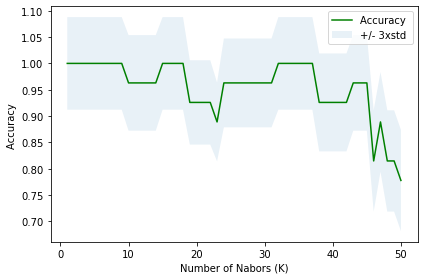

In [140]:
#y_pred=y_pred.reshape(101,1)
mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1]=np.std(y_pred)/np.sqrt(y_pred.shape[0])
plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
    

In [141]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1


In [142]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [143]:
y_pred=dtmodel.predict(X_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)
TreeAccuracy

1.0

In [144]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 1.000000


In [145]:
from sklearn import svm
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(X_train,y_train)

SVC()

In [146]:
y_pred=svmmodel.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0], dtype=int64)

In [147]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrmodel=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
y_pred=lrmodel.predict(X_test)
print(y_pred)
print(lrmodel.predict_proba(X_test))
print("Accuracy=",accuracy_score(y_test, y_pred))

[1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0]
[[0.33106009 0.66893991]
 [0.36021091 0.63978909]
 [0.65207871 0.34792129]
 [0.59882347 0.40117653]
 [0.33683698 0.66316302]
 [0.39257066 0.60742934]
 [0.3445081  0.6554919 ]
 [0.31879182 0.68120818]
 [0.3592704  0.6407296 ]
 [0.59882347 0.40117653]
 [0.3592704  0.6407296 ]
 [0.65560827 0.34439173]
 [0.31879182 0.68120818]
 [0.42370706 0.57629294]
 [0.3592704  0.6407296 ]
 [0.3726812  0.6273188 ]
 [0.32693997 0.67306003]
 [0.40328743 0.59671257]
 [0.3592704  0.6407296 ]
 [0.65207871 0.34792129]
 [0.31879182 0.68120818]
 [0.33106009 0.66893991]
 [0.70535898 0.29464102]
 [0.65199708 0.34800292]
 [0.39257066 0.60742934]
 [0.3592704  0.6407296 ]
 [0.63633202 0.36366798]]
Accuracy= 1.0


In [149]:
y_test.value_counts()

Churned
1          19
0           8
dtype: int64

In [150]:
19/8 # this is called as NULL accuracy


2.375

In [151]:
lrmodel.classes_ #shows the order of classes 
#first column is what is probability that it is 0
#Second column is what is probability that it is 1

array([0, 1], dtype=int64)

In [152]:
#now take only positive probabilities and change threshold of positive prediction
yprediction_prob = lrmodel.predict_proba(X_test)[:, 1]
#display some sample
yprediction_prob[0:13]

array([0.66893991, 0.63978909, 0.34792129, 0.40117653, 0.66316302,
       0.60742934, 0.6554919 , 0.68120818, 0.6407296 , 0.40117653,
       0.6407296 , 0.34439173, 0.68120818])

In [153]:
# predict churn if the predicted probability is greater than 0.5
from sklearn.preprocessing import binarize
yprediction_class = binarize([yprediction_prob],threshold=0.5)
print(yprediction_class)

[[1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
  1. 1. 0.]]


In [154]:
yprediction_class=yprediction_class[0]
print(yprediction_class)

[1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 0.]


In [155]:
#As origional label values are 'negative' and 'positive' we need to convert it to 0 and 1
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test1=label_encoder.fit_transform(y_test)
print(y_test1)

[1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0]


In [156]:
confusionmatrix1=metrics.confusion_matrix(y_test1, yprediction_class)
print("accuracy with default threshold 0.5=",metrics.accuracy_score(y_test1, yprediction_class))
#default accuracy
print("accuracy with default threshold 0=",metrics.accuracy_score(y_test, yprediction_class))

accuracy with default threshold 0.5= 1.0
accuracy with default threshold 0= 1.0


In [158]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test1, yprediction_prob))#yprediction_prob is probability of instance is positive

1.0


In [159]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
    
evaluate_threshold(0.5)
evaluate_threshold(0.4)
evaluate_threshold(0.3)

Sensitivity: 1.0
Specificity: 1.0
Sensitivity: 1.0
Specificity: 0.75
Sensitivity: 1.0
Specificity: 0.25


In [160]:
#confusion Matrix
# IMPORTANT: first argument is actual values, second argument is predicted values
from sklearn import metrics
confusionmatrix=metrics.confusion_matrix(y_test, yprediction_class)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

[[ 8  0]
 [ 0 19]]


In [161]:
print("True Positive cases=",TP)
print("True Negative cases=",TN)
print("False Positive cases=",FP)
print("False Negative cases=",FN)
Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

True Positive cases= 19
True Negative cases= 8
False Positive cases= 0
False Negative cases= 0
Total positive cases= 19
Total negative cases= 8


In [162]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy=",accuracy)
print("accuracy=",accuracy_score(y_test, yprediction_class))

accuracy= 1.0
accuracy= 1.0


In [163]:
#Sensitivity is also called as Recall or True Positive Rate 
#sensitivity is nothing but out of total positive cases how many  are correctly predicted as positive
sensitivity=TP/Total_Positive_Cases
print("sensitivity=",sensitivity)
#we can get it using inbuilt function as well
#print("sensitivity=",metrics.recall_score(y_test, yprediction))#inbuilt function not working

sensitivity= 1.0


In [164]:
#specificity is nothing but out of total negative predictions how many are correctly predicted as negative
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)

specificity= 1.0


In [165]:
#False Positive Rate is nothing but out of total negative cases how many are incorrectly predicted as positive
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)

FPR= 0.0


In [166]:
#False Negative Rate is nothing but out of total positive cases how many are incorrectly predicted as negative
FNR=FN/Total_Positive_Cases
print("FNR=", FNR)
print(1-sensitivity)

FNR= 0.0
0.0


In [167]:
#precision is nothing but out of total positive predictions how many are true postive
precision=TP/(TP+FP)
print("precision=", precision)
#print(metrics.precision_score(y_test, yprediction)) #inbuilt function not working

precision= 1.0


In [168]:
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print(Weighted_TPR_TNR)

1.0


In [169]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [170]:
insurance_test=pd.read_excel("E:/SEM2/1.SUBJECTS/BRM/Insurance_Classification_Final_Test_Data.xlsx",index_col=0)

In [171]:
insurance_test.shape

(18, 14)

In [172]:
insurance_test['Churned'].replace(['No','Yes'],[0, 1], inplace=True)

In [173]:
insurance_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 81 to 64
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Starting Age                 18 non-null     int64
 1   Family                       18 non-null     int64
 2   Gender                       18 non-null     int64
 3   Occupation                   18 non-null     int64
 4   Approximate Annual Income    18 non-null     int64
 5   Renewal Tenure               18 non-null     int64
 6   Policy Type                  18 non-null     int64
 7   Policy With1                 18 non-null     int64
 8   Policy With2                 18 non-null     int64
 9   PolicyWith1OccupationStatus  18 non-null     int64
 10  PolicyWith2OccupationStatus  18 non-null     int64
 11  Premium                      18 non-null     int64
 12  Renewed                      18 non-null     int64
 13  Churned                      18 non-null     int64


In [174]:
insurance_final_prediction=insurance_test
insurance_x=insurance_final_prediction.drop(['Churned'], axis = 1)

In [175]:
insurance_x=insurance_x.to_numpy(dtype='int', na_value=-1)

In [176]:
insurance_y=insurance_test['Churned']

In [177]:
insurance_y=insurance_y.to_numpy(dtype='int', na_value=-1)

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrmodel=LogisticRegression(C=0.01,solver='liblinear').fit(insurance_x,insurance_y)
y_pred=lrmodel.predict(insurance_x)
print(y_pred)
print(lrmodel.predict_proba(insurance_x))
print("Accuracy=",accuracy_score(insurance_y, y_pred))


[1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0]
[[6.71966360e-03 9.93280336e-01]
 [3.11421115e-02 9.68857889e-01]
 [2.88364192e-01 7.11635808e-01]
 [6.71966360e-03 9.93280336e-01]
 [3.30956190e-01 6.69043810e-01]
 [2.88364192e-01 7.11635808e-01]
 [3.40928855e-01 6.59071145e-01]
 [2.88364192e-01 7.11635808e-01]
 [3.40928855e-01 6.59071145e-01]
 [6.24335802e-02 9.37566420e-01]
 [9.89085836e-01 1.09141639e-02]
 [3.72565134e-01 6.27434866e-01]
 [9.66103301e-01 3.38966985e-02]
 [8.77877995e-01 1.22122005e-01]
 [7.60131054e-01 2.39868946e-01]
 [8.14702483e-01 1.85297517e-01]
 [8.14712737e-01 1.85287263e-01]
 [9.99999278e-01 7.21867719e-07]]
Accuracy= 0.8888888888888888


In [197]:
#now take only positive probabilities and change threshold of positive prediction
yprediction_prob = lrmodel.predict_proba(insurance_x)[:, 1]
#display some sample
yprediction_prob[0:18]

array([9.93280336e-01, 9.68857889e-01, 7.11635808e-01, 9.93280336e-01,
       6.69043810e-01, 7.11635808e-01, 6.59071145e-01, 7.11635808e-01,
       6.59071145e-01, 9.37566420e-01, 1.09141639e-02, 6.27434866e-01,
       3.38966985e-02, 1.22122005e-01, 2.39868946e-01, 1.85297517e-01,
       1.85287263e-01, 7.21867719e-07])

In [198]:
# predict churn if the predicted probability is greater than 0.5
from sklearn.preprocessing import binarize
yprediction_class = binarize([yprediction_prob],threshold=0.5)
yprediction_class=yprediction_class[0]

In [200]:
#confusion Matrix
# IMPORTANT: first argument is actual values, second argument is predicted values
from sklearn import metrics
confusionmatrix=metrics.confusion_matrix(insurance_y, yprediction_class)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

[[7 2]
 [0 9]]


In [192]:
y_pred_knn=knnmodel.predict(insurance_x)
y_pred_dt=dtmodel.predict(insurance_x)
y_pred_svm=svmmodel.predict(insurance_x)
y_pred_lr=lrmodel.predict(insurance_x)
y_pred_lr_proba=lrmodel.predict_proba(insurance_x)
y_pred_nb=gnb.predict(insurance_x)
y_pred_rf=final_classifier.predict(insurance_x)

In [193]:
print(f1_score(insurance_y,y_pred_knn))
print(f1_score(insurance_y,y_pred_dt))
print(f1_score(insurance_y,y_pred_svm))
print(f1_score(insurance_y,y_pred_lr))
print(f1_score(insurance_y,y_pred_nb))
print(f1_score(insurance_y,y_pred_rf))

0.9
1.0
0.6666666666666666
0.0
0.0
1.0


In [194]:
print(jaccard_score(insurance_y,y_pred_knn))
print(jaccard_score(insurance_y,y_pred_dt))
print(jaccard_score(insurance_y,y_pred_svm))
print(jaccard_score(insurance_y,y_pred_lr))
print(jaccard_score(insurance_y,y_pred_nb))
print(jaccard_score(insurance_y,y_pred_rf))

0.8181818181818182
1.0
0.5
0.0
0.0
1.0


In [180]:
LR_log_loss=log_loss(insurance_y,y_pred_lr_proba)
LR_log_loss

17.269388197455342

In [181]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(insurance_x)

In [182]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(insurance_y, y_pred))

Accuracy: 0.5


In [183]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
Log_svc= SVC(C= 1)
model_svc=lrmodel.fit(X_train,y_train)
pred_test_svc=model_svc.predict(X_test)
print(classification_report(y_true=y_test,y_pred=pred_test_svc,target_names=['Churned','Yes']))

              precision    recall  f1-score   support

     Churned       1.00      1.00      1.00         8
         Yes       1.00      1.00      1.00        19

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()
param_grid = {'n_estimators':[100,200], 'max_depth':[5,7,10]}
gridSearch = GridSearchCV(estimator=estimator,param_grid=param_grid,scoring='f1',cv=5,return_train_score=True,n_jobs=-1)
gridSearch.fit(X_train,y_train)
gridSearch.best_estimator_

cv_results = pd.DataFrame(gridSearch.cv_results_)[['param_n_estimators','param_max_depth','mean_train_score','mean_test_score']]
cv_results

final_classifier = gridSearch.best_estimator_
final_classifier.fit(X_train, y_train)
y_train_pred = final_classifier.predict(X_train)
y_test_predicted = final_classifier.predict(X_test)
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        19

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

def find_best_threshold(fpr, tpr, thresholds):
  max_metric = 0
  best_threshold = thresholds[0]
  for i,threshold in enumerate(thresholds):
    metric = tpr[i]*(1-fpr[i])
    if(metric>max_metric):
      max_metric = metric
      best_threshold = threshold
  return best_threshold

estimator = DecisionTreeClassifier()
param_grid = {'max_depth':[10,15,18]}
gridSearch = GridSearchCV(estimator=estimator,param_grid=param_grid,scoring='f1',cv=5,return_train_score=True,n_jobs=-1)
gridSearch.fit(X_train,y_train)
gridSearch.best_estimator_

cv_results = pd.DataFrame(gridSearch.cv_results_)
cv_results = cv_results[['param_max_depth','mean_train_score','mean_test_score']]
cv_results

final_classifier = DecisionTreeClassifier(max_depth=18)
final_classifier.fit(X_train,y_train)
y_train_pred = final_classifier.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
best_threshold = find_best_threshold(fpr, tpr, thresholds)

best_threshold

y_test_predicted=final_classifier.predict(X_test)
test_score = roc_auc_score(y_test,y_test_predicted)
print(test_score)
print(classification_report(y_test,y_test_predicted))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        19

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

